In [1]:
# Qiskit Libraries needed to run HHL Algorithm

import qiskit.algorithms
from typing import Optional, Union, List, Callable, Tuple
import numpy as np

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram

from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit.library.arithmetic.piecewise_chebyshev import PiecewiseChebyshev
from qiskit.circuit.library.arithmetic.exact_reciprocal import ExactReciprocal
from qiskit.opflow import (
    Z,
    I,
    StateFn,
    TensoredOp,
    ExpectationBase,
    CircuitSampler,
    ListOp,
    ExpectationFactory,
)
from qiskit.providers import Backend
from qiskit.quantum_info.operators.base_operator import BaseOperator
from qiskit.utils import QuantumInstance
from qiskit.utils.deprecation import deprecate_function

from qiskit.algorithms.linear_solvers import LinearSolver, LinearSolverResult
from qiskit.algorithms.linear_solvers.matrices.numpy_matrix import NumPyMatrix
from qiskit.algorithms.linear_solvers.observables.linear_system_observable import LinearSystemObservable

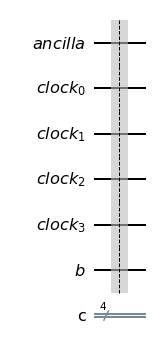

In [2]:
# Initialize State (Psi_0)
clock = QuantumRegister(4, name='clock') # Clock/C Register/A Matrix with 4 bits
b = QuantumRegister(1, name='b') # B Register with 1 bit
ancilla = QuantumRegister(1, name='ancilla') # Ancilla Qubit with 1 bit
measurement = ClassicalRegister(4, name='c')

# Creating an empty circuit with intial state (defined above)
circuit = QuantumCircuit(ancilla, clock, b, measurement)

# Drawing barrier for state zero to make it easy to visualize (dotted line shown)
circuit.barrier()

# Drawing circuit
circuit.draw(output='mpl')

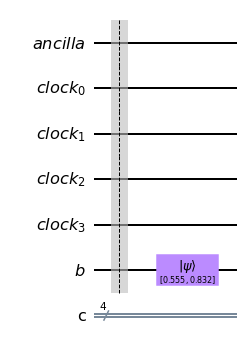

In [3]:
# State preparation. 
intial_state = [2/np.sqrt(13),3/np.sqrt(13)] # Initializing specific B matrix with normalized probability amplitudes
circuit.initialize(intial_state, 5) # Initialize state (encode) on the 5th bit

# Drawing Circuit
circuit.draw('mpl',scale=1)

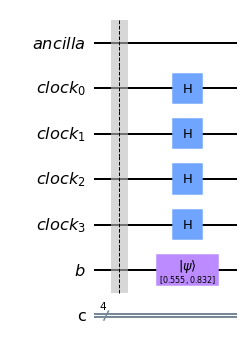

In [4]:
# Applying Hadamard gates to all the clock qubits
circuit.h(clock) # Clock variable stores all the clock bits. .h() applies Haramard gate to each of these bits.

# Drawing Circuit
circuit.draw('mpl',scale=1)

In [5]:
# Sample Matrix problem to be solved
A = np.array([[1,4],[4,1]])
B = np.array([2,3]).T 

In [18]:
# Supposedly is using Hamiltonian encoding to encode the A Matrix
matrix_circuit = NumPyMatrix(A, evolution_time=2 * np.pi)
matrix_circuit.decompose().decompose().draw('mpl',scale=1)

matrix_circuit arg1

SyntaxError: invalid syntax (4028061343.py, line 5)

In [7]:
reciprocal_circuit = ExactReciprocal(len(clock), 1 / (2**len(clock)), True)

QuantumRegister(4, 'clock')

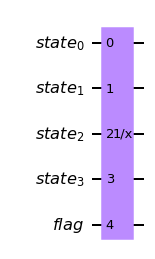

In [11]:
reciprocal_circuit.draw('mpl',scale=1)

In [16]:
# QPE
phase_estimation = PhaseEstimation(len(clock), matrix_circuit)
if len(ancilla) > 0:
    circuit.append(phase_estimation, clock[:] + b[:] + ancilla[: matrix_circuit.num_ancillas])
else:
    circuit.append(phase_estimation, clock[:] + b[:])

# Conditioned rotation
#if _exact_reciprocal:

    circuit.append(reciprocal_circuit, clock[::-1])


# QPE inverse
if len(ancilla) > 0:
    circuit.append(phase_estimation.inverse(), clock[:] + b[:] + ancilla[: matrix_circuit.num_ancillas])
else:
    circuit.append(phase_estimation.inverse(), clock[:] + b[:])

CircuitError: 'The amount of qubit arguments 4 does not match the instruction expectation (5).'